# Đọc file CSV

In [1]:
from IPython.display import display
import pandas as pd
data_filter = pd.read_csv('./data.csv')
display(data_filter.head(5))

,Time,Location,MaxTemperature,AvgTemperature,MinTemperature,MaxDewPoint,AvgDewPoint,MinDewPoint,MaxHumidity,AvgHumidity,MinHumidity,MaxWindspeed,AvgWindspeed,MinWindspeed
0,2021-1-1,HoChiMinh,86,77.3,73,63,61.2,61,65,57.2,45,12,7.3,5
1,2021-1-2,HoChiMinh,88,78.5,72,66,63.0,61,73,59.5,45,12,6.5,2
2,2021-1-3,HoChiMinh,90,80.5,72,73,67.9,63,83,67.0,46,7,4.1,0
3,2021-1-4,HoChiMinh,91,82.0,75,77,70.1,64,94,70.0,41,10,4.6,1
4,2021-1-5,HoChiMinh,90,81.6,75,77,71.5,66,89,72.3,46,9,4.0,1


# Xử lý dữ liệu

## Kiểm tra dữ liệu bị rỗng



In [2]:
data_filter.isnull().sum()

Time              0
Location          0
MaxTemperature    0
AvgTemperature    0
MinTemperature    0
MaxDewPoint       0
AvgDewPoint       0
MinDewPoint       0
MaxHumidity       0
AvgHumidity       0
MinHumidity       0
MaxWindspeed      0
AvgWindspeed      0
MinWindspeed      0
dtype: int64

## Xử lý dữ liệu bằng 0

**Kiểm tra dữ liệu**

In [3]:
# Kiểm tra có dòng dữ liệu nào có giá trị bằng 0 trong các cột
columns_check= ['MaxTemperature','AvgTemperature','MinTemperature',
                'MaxDewPoint','AvgDewPoint','MinDewPoint',
                'MaxHumidity','AvgHumidity','MinHumidity',
                'MaxWindspeed','AvgWindspeed']

zero_rows = data_filter[(data_filter[columns_check] == 0).any(axis=1)]
sum_zero = len(zero_rows)

# Lưu vị trí
zero_location = zero_rows.index

# In ra các dòng dữ liệu có giá trị bằng 0
display(zero_rows)
print("Tổng số dòng có dữ liệu bằng 0: ",sum_zero)

,Time,Location,MaxTemperature,AvgTemperature,MinTemperature,MaxDewPoint,AvgDewPoint,MinDewPoint,MaxHumidity,AvgHumidity,MinHumidity,MaxWindspeed,AvgWindspeed,MinWindspeed
152,2021-6-2,HoChiMinh,93,83.6,75,82,78.1,0,100,86.3,0,17,5.5,1
315,2021-11-12,HoChiMinh,93,82.3,75,79,73.8,0,100,80.1,0,9,3.9,0
379,2022-1-15,HoChiMinh,93,77.1,0,72,64.8,0,100,67.2,0,9,3.7,0
538,2022-6-23,HoChiMinh,91,81.0,77,81,75.2,0,100,86.0,0,17,4.7,1
694,2022-11-26,HoChiMinh,91,80.5,0,79,75.7,0,100,84.4,0,15,4.8,1
797,2023-3-9,HoChiMinh,93,79.3,0,72,65.4,0,89,63.1,0,12,6.0,1


Tổng số dòng có dữ liệu bằng 0:  6


**Xử lý dữ liệu bằng 0**

In [4]:
data_handle = data_filter.copy()

# Thay thế các giá trị bằng 0 bằng median
median_values = data_handle[columns_check].median()
data_handle[columns_check] = data_handle[columns_check].replace(0, median_values)

# In ra các dòng sau khi xử lý
rows_median = data_handle.loc[zero_location]
print("Dữ liệu sau khi đã xử lý")
display(rows_median)

Dữ liệu sau khi đã xử lý


,Time,Location,MaxTemperature,AvgTemperature,MinTemperature,MaxDewPoint,AvgDewPoint,MinDewPoint,MaxHumidity,AvgHumidity,MinHumidity,MaxWindspeed,AvgWindspeed,MinWindspeed
152,2021-6-2,HoChiMinh,93,83.6,75,82,78.1,72,100,86.3,52,17,5.5,1
315,2021-11-12,HoChiMinh,93,82.3,75,79,73.8,72,100,80.1,52,9,3.9,0
379,2022-1-15,HoChiMinh,93,77.1,77,72,64.8,72,100,67.2,52,9,3.7,0
538,2022-6-23,HoChiMinh,91,81.0,77,81,75.2,72,100,86.0,52,17,4.7,1
694,2022-11-26,HoChiMinh,91,80.5,77,79,75.7,72,100,84.4,52,15,4.8,1
797,2023-3-9,HoChiMinh,93,79.3,77,72,65.4,72,89,63.1,52,12,6.0,1


## Chuyển đổi đơn vị trong dữ liệu
- Temperature (Nhiệt độ): Độ F -> Độ C
- DewPoint (Điểm sương): Độ F -> Độ C

In [5]:
data_convert = data_handle.copy()
columns = ['MaxTemperature', 'AvgTemperature', 'MinTemperature', 'MaxDewPoint', 'AvgDewPoint', 'MinDewPoint']

for i in columns:
    data_convert[i] = round((data_handle[i] - 32) / 1.8, 1 if 'Avg' in i else 0)

display(data_convert)

,Time,Location,MaxTemperature,AvgTemperature,MinTemperature,MaxDewPoint,AvgDewPoint,MinDewPoint,MaxHumidity,AvgHumidity,MinHumidity,MaxWindspeed,AvgWindspeed,MinWindspeed
0,2021-1-1,HoChiMinh,30.0,25.2,23.0,17.0,16.2,16.0,65,57.2,45,12,7.3,5
1,2021-1-2,HoChiMinh,31.0,25.8,22.0,19.0,17.2,16.0,73,59.5,45,12,6.5,2
2,2021-1-3,HoChiMinh,32.0,26.9,22.0,23.0,19.9,17.0,83,67.0,46,7,4.1,0
3,2021-1-4,HoChiMinh,33.0,27.8,24.0,25.0,21.2,18.0,94,70.0,41,10,4.6,1
4,2021-1-5,HoChiMinh,32.0,27.6,24.0,25.0,21.9,19.0,89,72.3,46,9,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,2023-5-27,HoChiMinh,32.0,26.5,23.0,27.0,25.4,23.0,100,94.5,75,13,4.7,1
877,2023-5-28,HoChiMinh,32.0,27.7,25.0,28.0,26.0,25.0,100,90.7,75,15,4.8,0
878,2023-5-29,HoChiMinh,34.0,28.9,27.0,27.0,26.4,26.0,100,86.7,66,13,5.9,1
879,2023-5-30,HoChiMinh,34.0,29.4,26.0,28.0,26.4,24.0,100,84.1,56,18,8.0,0


In [6]:
data_convert.to_csv("data_pre.csv", index=False)
print("Dữ liệu xử lý đã được lưu vào file data_pre.csv")

Dữ liệu xử lý đã được lưu vào file data_pre.csv


# Trích chọn đặc trưng (Feature Selection)

## Correlation Matrix

<ipython-input-7-945f16a7c433>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_convert.corr()


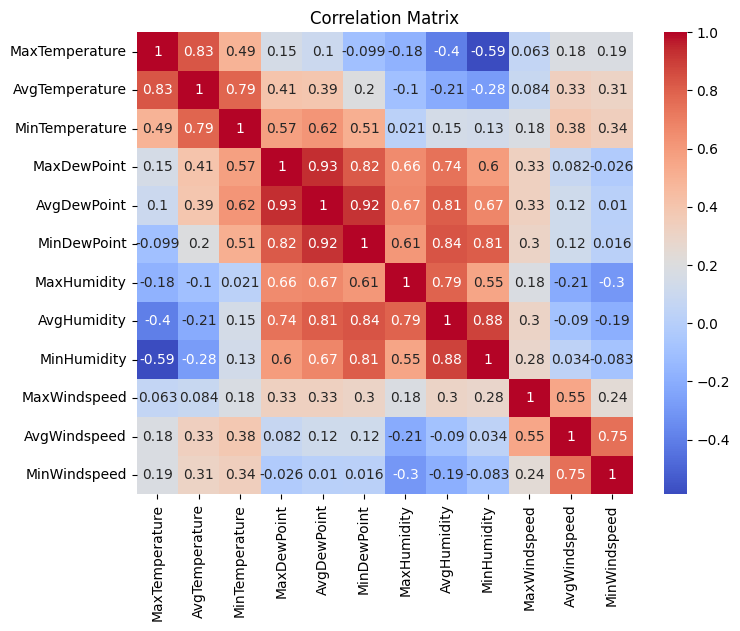

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán ma trận tương quan
corr_matrix = data_convert.corr()

# Hiển thị heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Chọn thuộc tính tương quan

**Nhiệt độ cao nhất**

In [8]:
prop_maxtemp = data_convert[['MaxTemperature','AvgTemperature','MinTemperature']]
display(prop_maxtemp)

,MaxTemperature,AvgTemperature,MinTemperature
0,30.0,25.2,23.0
1,31.0,25.8,22.0
2,32.0,26.9,22.0
3,33.0,27.8,24.0
4,32.0,27.6,24.0
...,...,...,...
876,32.0,26.5,23.0
877,32.0,27.7,25.0
878,34.0,28.9,27.0
879,34.0,29.4,26.0


**Nhiệt độ thấp nhất**

In [9]:
prop_mintemp = data_convert[['MinTemperature','AvgTemperature','MaxDewPoint','AvgDewPoint']]
display(prop_mintemp)

,MinTemperature,AvgTemperature,MaxDewPoint,AvgDewPoint
0,23.0,25.2,17.0,16.2
1,22.0,25.8,19.0,17.2
2,22.0,26.9,23.0,19.9
3,24.0,27.8,25.0,21.2
4,24.0,27.6,25.0,21.9
...,...,...,...,...
876,23.0,26.5,27.0,25.4
877,25.0,27.7,28.0,26.0
878,27.0,28.9,27.0,26.4
879,26.0,29.4,28.0,26.4


# Chuẩn hóa dữ liệu

## Nhiệt độ cao nhất

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Chuẩn hoá đơn vị (Min-Max Scaling)
scaler_maxtemp = MinMaxScaler()
scaler_maxtemp.fit(prop_maxtemp)

# Tạo dataframe từ dữ liệu chuẩn hoá
normal_maxtemp = scaler_maxtemp.transform(prop_maxtemp)
df_normal_maxtemp = pd.DataFrame(normal_maxtemp, columns=prop_maxtemp.columns)
display(df_normal_maxtemp)

,MaxTemperature,AvgTemperature,MinTemperature
0,0.272727,0.208791,0.454545
1,0.363636,0.274725,0.363636
2,0.454545,0.395604,0.363636
3,0.545455,0.494505,0.545455
4,0.454545,0.472527,0.545455
...,...,...,...
876,0.454545,0.351648,0.454545
877,0.454545,0.483516,0.636364
878,0.636364,0.615385,0.818182
879,0.636364,0.670330,0.727273


In [11]:
# Lưu dữ liệu chuẩn hóa
df_normal_maxtemp.to_csv("DataNormal_Maxtemp.csv", index=False)
print("Dữ liệu xử lý đã được lưu vào file DataNormal_Maxtemp.csv")

Dữ liệu xử lý đã được lưu vào file DataNormal_Maxtemp.csv


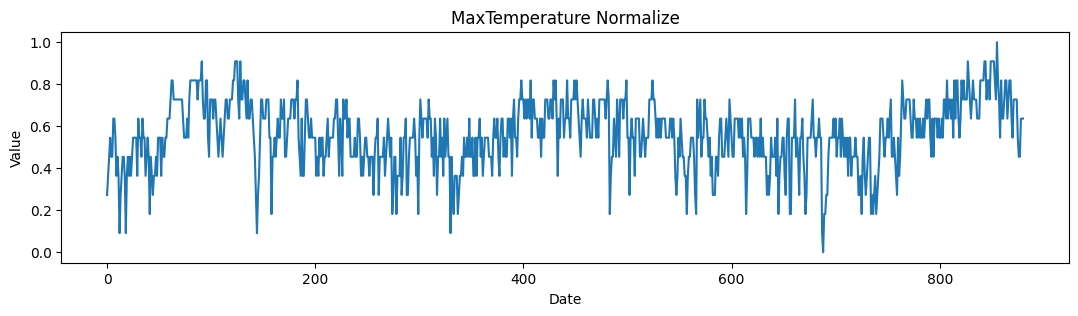

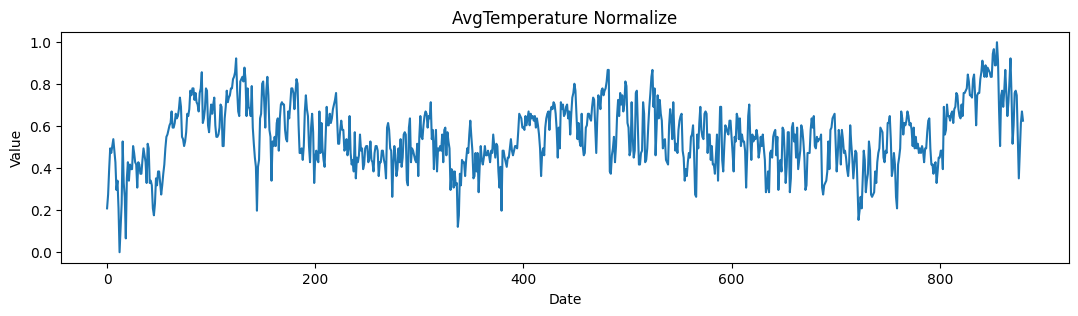

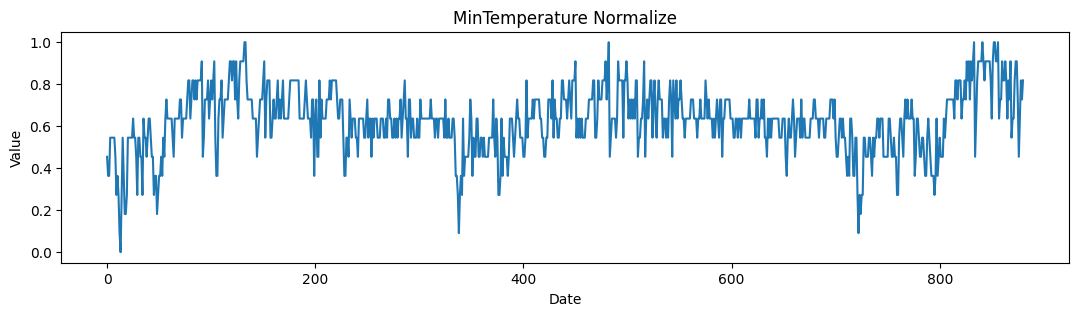

In [12]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cho từng cột dữ liệu
for column in df_normal_maxtemp.columns:
    plt.figure(figsize=(13, 3))
    plt.plot(df_normal_maxtemp[column])
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(column + ' Normalize')
    plt.show()

## Nhiệt độ thấp nhất

In [13]:
# Chuẩn hoá đơn vị (Min-Max Scaling)
scaler_mintemp = MinMaxScaler()
scaler_mintemp.fit(prop_mintemp)

# Tạo dataframe từ dữ liệu chuẩn hoá
normal_mintemp = scaler_mintemp.transform(prop_mintemp)
df_normal_mintemp = pd.DataFrame(normal_mintemp, columns=prop_mintemp.columns)
display(df_normal_mintemp)

,MinTemperature,AvgTemperature,MaxDewPoint,AvgDewPoint
0,0.454545,0.208791,0.000000,0.111111
1,0.363636,0.274725,0.166667,0.190476
2,0.363636,0.395604,0.500000,0.404762
3,0.545455,0.494505,0.666667,0.507937
4,0.545455,0.472527,0.666667,0.563492
...,...,...,...,...
876,0.454545,0.351648,0.833333,0.841270
877,0.636364,0.483516,0.916667,0.888889
878,0.818182,0.615385,0.833333,0.920635
879,0.727273,0.670330,0.916667,0.920635


In [14]:
# Lưu dữ liệu chuẩn hóa
df_normal_mintemp.to_csv("DataNormal_Mintemp.csv", index=False)
print("Dữ liệu xử lý đã được lưu vào file DataNormal_Mintemp.csv")

Dữ liệu xử lý đã được lưu vào file DataNormal_Mintemp.csv


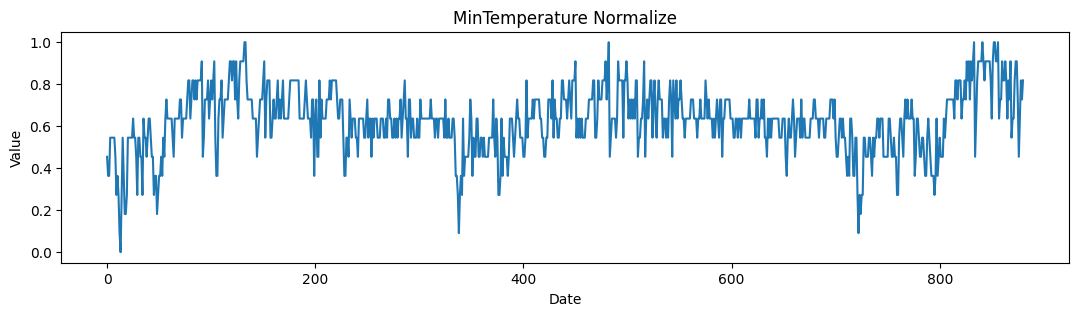

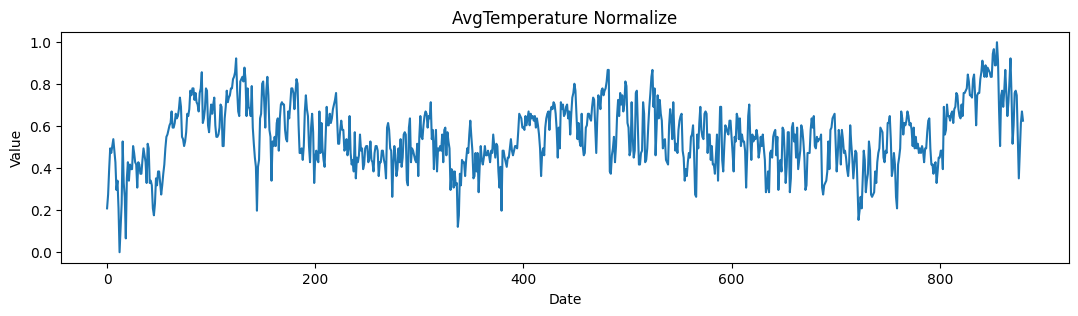

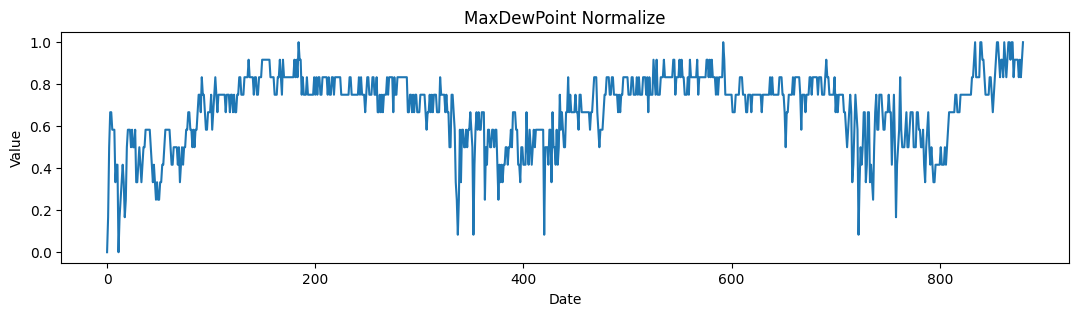

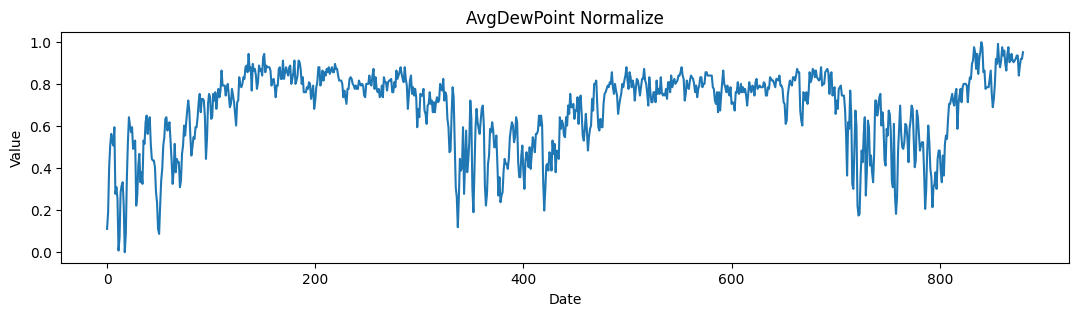

In [15]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cho từng cột dữ liệu
for column in df_normal_mintemp.columns:
    plt.figure(figsize=(13, 3))
    plt.plot(df_normal_mintemp[column])
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(column + ' Normalize')
    plt.show()